## Machine Learning and Statistics:
# Overview of the Scikit-Learn Python Library
### Author: Julian Dunne | Email:[g00267940@gmit.ie]
***

## Set the Scene

Machine learning algorithms are applied to a wide range of technologies from autonomous driving to stock market trading. Each algorithm follows a different approach and requires different levels of input, but with the same objective of learning from the data to solve a particular problem. This notebook will focus on supervised and unsupervised machine learning algorithms.
***

## Supervised Machine Learning
Supervised machine learning algorithms are reliant on accurately labelled data[1]. The algorithm is fed data containing input and desired output values which the system then learns from the relationship between the input and output training data to build the model. This notebook will use supervised machine learning to demonstrate:
* A regression type method whereby the model is trained to identify patterns within the training dataset. Once the relationship between the variables and the expected outcomes is understood it can then applied to new data with the model predicting the expected outcome.
* A classification type method whereby the algorithm will be trained to identify and categorise objects using the training data.
***

## Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Helper functions.
import sklearn.model_selection as mod

# Logistic regression.
import sklearn.linear_model as lm

***
# PART 1: Classification
***
## Wine Quality Dataset

In [2]:
#Import the wine quality dataset
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Check if any data is missing
df_wine.isnull().any().any()

False

In [4]:
# Summary statistics
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


***
## Negative and positive correlations between variables

<AxesSubplot:>

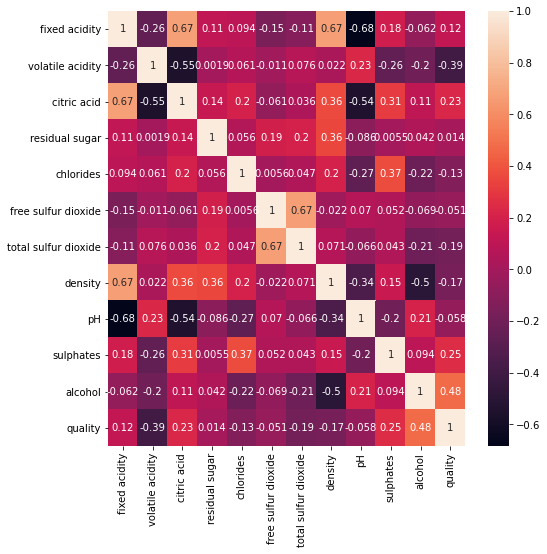

In [5]:
# Correlation heatmap between numerical variables visualised using seaborn.
plt.figure(figsize=(8, 8))
sns.heatmap(df_wine.corr(), annot=True)

The heatmap above shows several negative and positive correlations[4] between each of the variables however as the algorithm will be modelled to predict wine quality it is possible to drop several variables with the aim of improving the model accuracy.
*  Volatile acidity has a negative correlation with quality - as quality increases, volatile acidity decreases.
*  Sulphates and alcohol have a positive correlation with quality - as quality increases, sulphates and alcohol increase.

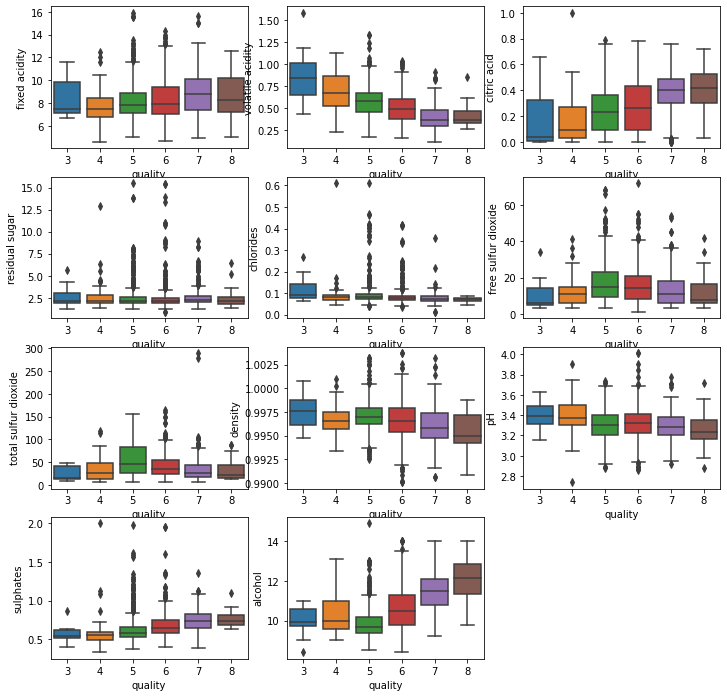

In [6]:
# Boxplot showing 'quality' on the x-axis visualised using seaborn[3].
plt.figure(figsize=(12, 12))
for column_index, column in enumerate(df_wine.columns):
    if column == 'quality':
        continue
    plt.subplot(4, 3, column_index + 1)
    sns.boxplot(x='quality', y=column, data=df_wine)

***
## Data Pre-Processing

In [7]:
# Reduce the number of variables in the dataset to improve model efficiency and accuracy
df_wine_mod = df_wine[['volatile acidity', 'sulphates', 'alcohol', 'quality']].copy()

In [8]:
# The instances of unique values for each variable [2]
for col in df_wine_mod.columns.values:
    print("Unique values of {} : {}".format(col, df_wine_mod[col].nunique()))

Unique values of volatile acidity : 143
Unique values of sulphates : 96
Unique values of alcohol : 65
Unique values of quality : 6


In [9]:
# Group unique datapoints in quality so that there is only higher quality(8) and lower quality(6) wine
df_wine_mod.loc[df_wine_mod['quality'] <= 6, 'quality'] = 6
df_wine_mod.loc[df_wine_mod['quality'] > 6, 'quality'] = 8

print("Number count of low and high quality wine:")
df_wine_mod['quality'].value_counts()

Number count of low and high quality wine:


6    1382
8     217
Name: quality, dtype: int64

***
## Data visualistion 

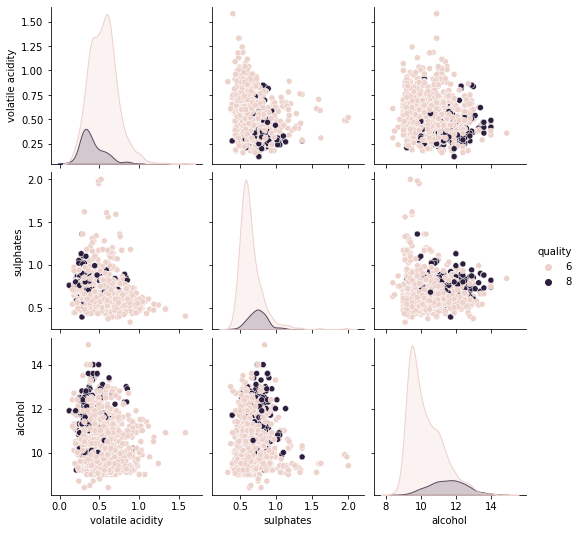

In [10]:
# Pairplot of data visualised using seaborn.
sns.pairplot(df_wine_mod, hue='quality')

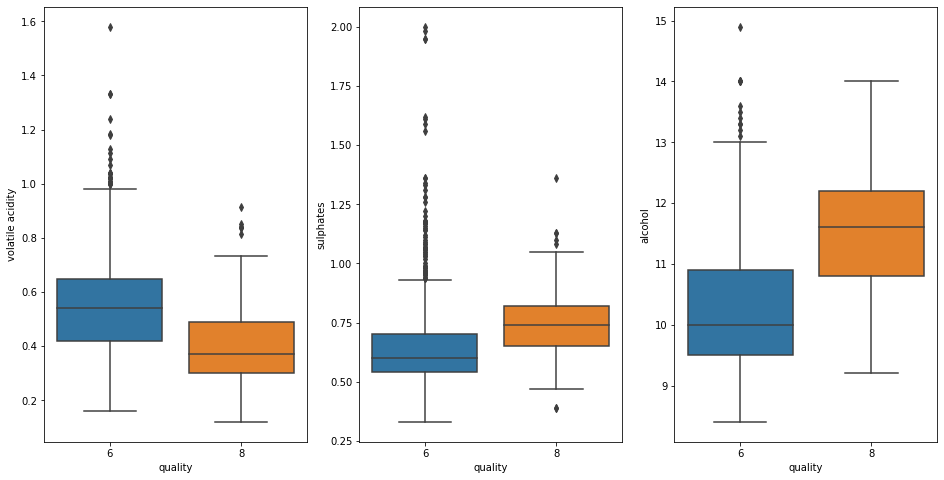

In [11]:
# Boxplot showing 'quality' on the x-axis visualised using seaborn[3].
plt.figure(figsize=(16, 8))
for column_index, column in enumerate(df_wine_mod.columns):
    if column == 'quality':
        continue
    plt.subplot(1, 3, column_index + 1)
    sns.boxplot(x='quality', y=column, data=df_wine_mod)

***
## Test and train split the data

In [12]:
# Split the data into random train and test subsets, test size = 30%
train, test = mod.train_test_split(df_wine_mod, test_size=0.3)

***
## Logistic Regression 

In [13]:
inputs, outputs = train[['volatile acidity', 'alcohol', 'sulphates']], train['quality']

In [14]:
# Fit to logistic regression model
lre = lm.LogisticRegression(random_state=0)
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [15]:
# Model accuracy
lre.score(test[['volatile acidity', 'alcohol', 'sulphates']], test['quality'])

0.8583333333333333

***

# PART 2: Regression
***
## Boston Housing Dataset

In [16]:
#Import the Boston housing dataset[5]
df_housing = pd.read_csv('bostonHousing.csv')
df_housing.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [17]:
# Check if any data is missing
df_housing.isnull().any().any()

False

In [18]:
# Summary statistics
df_housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


***
## Negative and positive correlations between variables

<AxesSubplot:>

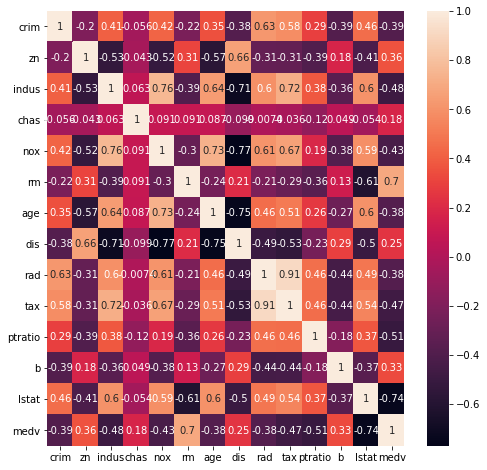

In [19]:
# Correlation heatmap between numerical variables visualised using seaborn.
plt.figure(figsize=(8, 8))
sns.heatmap(df_housing.corr(), annot=True)

The heatmap above shows several negative and positive correlations between each of the variables. This notebook will focus on the 'nox' and 'dis' columns.
* 'nox' has a negative correlation with 'dis' - as nitric oxide levels increase, distance to employment centres decrease.

***
## 2-D Scatter Plot of NOC vs DIS

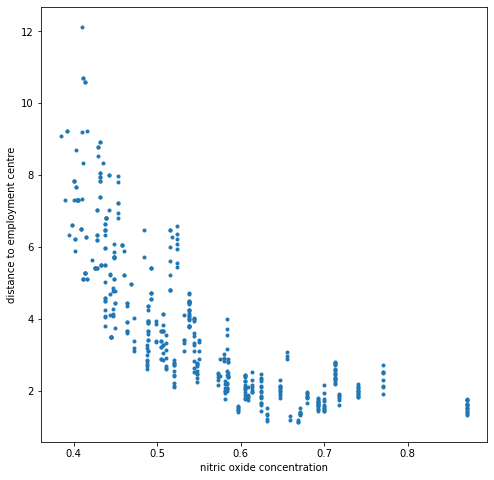

In [20]:
# New figure.
fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot.
ax.plot(df_housing['nox'], df_housing['dis'], '.')

# Set axis labels.
ax.set_xlabel('nitric oxide concentration');
ax.set_ylabel('distance to employment centre');

***
## Data Pre-Processing

In [21]:
# Create new dataset containing only the required columns
df_housing_mod = df_housing[['nox','dis']].copy()

***
## Test and train split the data

In [22]:
# Split the data into random train and test subsets, test size = 30%
X_train, X_test, y_train, y_test = mod.train_test_split(df_housing_mod['nox'], df_housing_mod['dis'], test_size=0.3, random_state=0)

In [23]:
# Save data in dataframe format so as to avoid reshape errors
X_train_df, X_test_df = pd.DataFrame(X_train), pd.DataFrame(X_test)

***
## Polynomial Regression 

In [24]:
# Add polynomial term to a linear equation using PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# Create object of PolynomialFeatures
poly = PolynomialFeatures(degree=3)

# Transform matrix of independent variables into new matrix with variables to power = degree
X_train_poly = poly.fit_transform(X_train_df)

# Used to determine the r2 score
X_test_poly = poly.fit_transform(X_test_df)

In [25]:
# Fit the Polynomial Regression model
model = lm.LinearRegression()
model = model.fit(X_train_poly, y_train)

#### Polynomial Regression model:

$y = \beta_0 + \beta_1x + \beta_2 x^2 + ..... + \beta_nx^n + \epsilon$ <br>

* <i>n</i> is the degree of the polynomial
* 
Although this model allows for a nonlinear relationship between Y and X, polynomial regression is still considered linear regression since it is linear in the regression coefficients $\beta_1, \beta_2... \beta_n$. [7]

In [26]:
# Get the coefficient and the intercept of the line from the trained model.
coefficient = model.coef_
intercept = model.intercept_

# Create an x-axis for plotting the regression line.
x_axis = np.arange(0.35, 0.9, 0.05)

# Polynomial Regression equation to nth degree = 3 (cubic).
response = intercept + coefficient[1] * x_axis + coefficient[2] * x_axis**2 + coefficient[3] * x_axis**3

## Idea for 'response' equation' found in youtube tutorial and modified to meet requirements for this notebook. See reference [8].

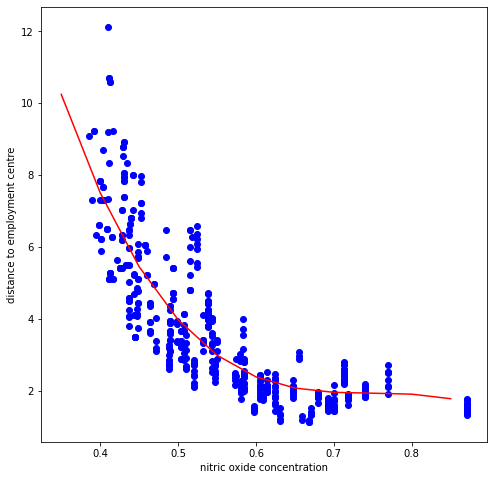

In [27]:
# 2d scatterplot with Polynomial Regression line.
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(df_housing_mod['nox'], df_housing_mod['dis'], color='b')
ax.plot(x_axis, response, color='r')

# Set axis labels.
ax.set_xlabel('nitric oxide concentration');
ax.set_ylabel('distance to employment centre');

plt.show()

In [31]:
# Model evaluation using R-Square
from sklearn.metrics import r2_score
y_predict_poly = model.predict(X_test_poly)
print("R-Square error:", r2_score(y_predict_poly, y_test))

R-Square error: 0.642586561141633


In [32]:
# Predicting the distance to employment centre using Polynomial Regression
print("The predicted 'dis' value is:", model.predict(poly.fit_transform([[0.8]])))

The predicted 'dis' value is: [1.90501209]


***

### Unsupervised Machine Learning:
Unsupervised machine learning algorithms are trained on datasets with no labels[1]. The algorithms are used to identify patterns in the datasets with unknown elements using segmentation to differentiate between the different data types. This notebook will use unsupervised machine learning to demonstrate:
* A cluster type method whereby the algorithm will identify the similarities and differences between each data point. It then maps the dataset into segments.

# REFERENCES:
***

[1] Machine Learning Blog Post; Author: Matt Trotter; url: https://www.seldon.io/four-types-of-machine-learning-algorithms-explained/ <br>
[2] Exploratory Data Analysis on Wine Data Set; Author: Shreya Srivastava; url: https://medium.com/@shreyasrivastav26/exploratory-data-analysis-on-wine-data-set-46ff17a42cd4 <br>
[3] Machine Learning Algorithms; Github url: https://github.com/Shriansh2008/Machine-learning-algorithms-on-Wine-Dataset/blob/master/Data%20Preprocessing.ipynb <br>
[4] Negative Correlation; Investopedia: https://www.investopedia.com/terms/n/negative-correlation.asp <br>
[5] Boston Housing dataset: https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv <br>
[6] Mathematical Python; Latex Blog; url: https://personal.math.ubc.ca/~pwalls/math-python/jupyter/latex/ <br>
[7] Polynomial Regression Analysis; PennState College article; url: https://online.stat.psu.edu/stat462/node/158/ <br>
[8] Polynomial Regression Tutorial; Youtube video: https://www.youtube.com/watch?v=SSmpyoIdJTc <br>
[9] Polynomial Regression Tutorial; Youtube video: https://www.youtube.com/watch?v=3L_-JbFxftM <br>